In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from dataset import parse_data
from mlxtend.plotting import plot_decision_regions
from utils import *

In [2]:
# Function to generate the required plots
def plot_data(X, Y, title=''):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:,1], c=Y)
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)
    plt.show()

In [3]:
# Implementation of Bayes Classifier
class BayesClassifier:
    def __init__(self, Y, nc):
        self.mean = None
        self.std_dev = None
        self.class_count = np.bincount(Y)
        self.num_classes = nc
        
    def compute_mean(self, X, Y):
        self.mean = np.zeros((self.num_classes, 2))
        
        for i in range(len(X)):
            self.mean[Y[i] - 1] = self.mean[Y[i] - 1] + X[i, :]
        
        for i in range(len(self.mean)):
            self.mean[i] = self.mean[i] / self.class_count[i+1]
            
    def compute_std_dev(self, X, Y):
        self.std_dev = np.zeros((self.num_classes, 2, 2))

        for i in range(len(X)):
            self.std_dev[Y[i] - 1] = self.std_dev[Y[i] - 1] + ((X[i, :] - self.mean[Y[i] - 1]).reshape(2, 1) * np.transpose((X[i, :] - self.mean[Y[i] - 1]).reshape(2, 1)))
        
        for i in range(len(self.std_dev)):
            self.std_dev[i] = self.std_dev[i] / self.class_count[i+1]
                
    def classify_example(self, X, example):
        discriminator = np.zeros(self.num_classes)
        for i in range(self.num_classes):
            discriminator[i] = np.log(self.class_count[i+1] / len(X)) - (0.5 * np.linalg.det(self.std_dev[i])) - (0.5 * np.matmul(np.transpose((example - self.mean[i]).reshape(2, 1)), np.matmul(np.linalg.inv(self.std_dev[i]), (example - self.mean[i]).reshape(2, 1))))
        
        return np.argmax(discriminator) + 1
    
    def predict(self, X):
        pred_y = np.zeros(len(X))
    
        for i in range(len(X)):
            pred_y[i] = self.classify_example(X, X[i, :])
            
        return np.array(pred_y)

# Linearly Separable Data

In [4]:
# Reading the data
root_dir = os.path.join('dataset', 'linearlySeparable')
X_train, Y_train = parse_data(root_dir, 'train')
X_val, Y_val = parse_data(root_dir, 'val')
X_test, Y_test = parse_data(root_dir, 'test')

In [5]:
# Using the training data to compute estimators for mean and variance
model = BayesClassifier(Y_train, 4)
model.compute_mean(X_train, Y_train)
model.compute_std_dev(X_train, Y_train)

In [6]:
# Make predictions using the classifier
pred_y = model.predict(X_test)

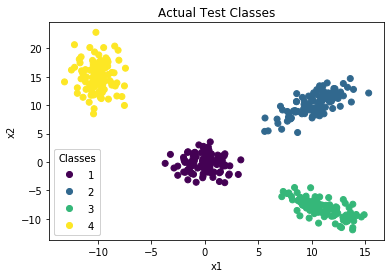

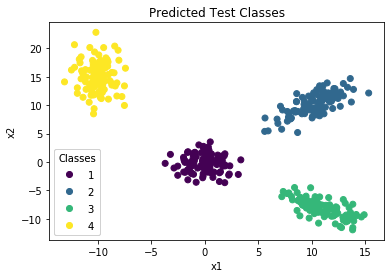

In [7]:
# Visualizaing the actual and predicted classes
plot_data(X_test, Y_test, 'Actual Test Classes')
plot_data(X_test, pred_y, 'Predicted Test Classes')

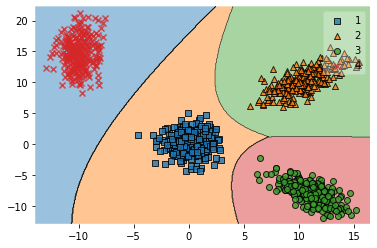

In [8]:
# Decision Region with Training Data
plot_decision_regions(X_train, Y_train, clf=model)

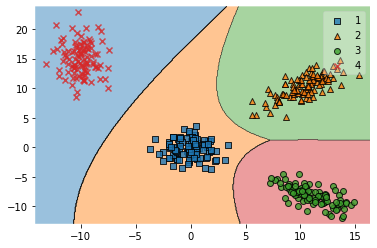

In [9]:
# Decision Region with Test Data
plot_decision_regions(X_test, Y_test, clf=model)

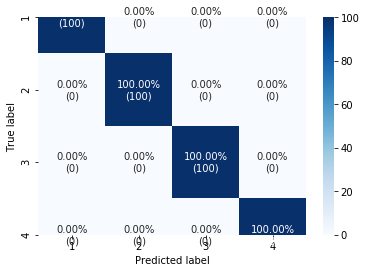

Mean Accuracy: 1.00
Mean Precision: 1.00
Mean Recall: 1.00
Mean F-measure: 1.00

Recall for class 1: 1.00
Recall for class 2: 1.00
Recall for class 3: 1.00
Recall for class 4: 1.00

F-measure for class 1: 1.00
F-measure for class 2: 1.00
F-measure for class 3: 1.00
F-measure for class 4: 1.00


In [10]:
# Performance Evaluation Metrics
confusion_matrix(Y_test, pred_y)
metrics_summary(Y_test, pred_y)

# Overlapping Data

In [11]:
# Reading the data
root_dir = os.path.join('dataset', 'overlapping')
X_train, Y_train = parse_data(root_dir, 'train')
X_val, Y_val = parse_data(root_dir, 'val')
X_test, Y_test = parse_data(root_dir, 'test')

In [12]:
# Using the training data to compute estimators for mean and variance
model = BayesClassifier(Y_train, 3)
model.compute_mean(X_train, Y_train)
model.compute_std_dev(X_train, Y_train)

In [13]:
# Make predictions using the classifier
pred_y = model.predict(X_test)

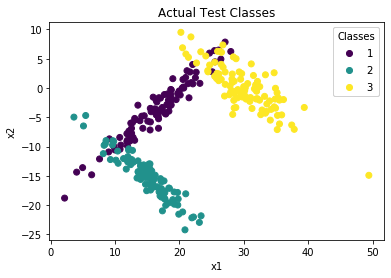

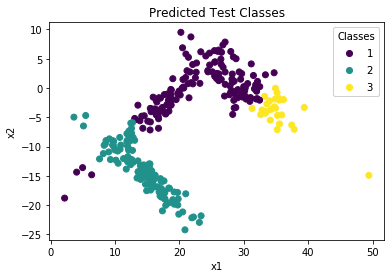

In [14]:
# Visualizaing the actual and predicted classes
plot_data(X_test, Y_test, 'Actual Test Classes')
plot_data(X_test, pred_y, 'Predicted Test Classes')

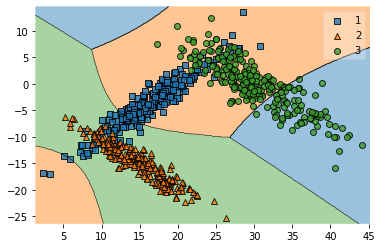

In [15]:
# Decision Region with Training Data
plot_decision_regions(X_train, Y_train, clf=model)

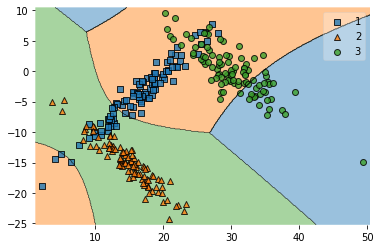

In [16]:
# Decision Region with Test Data
plot_decision_regions(X_test, Y_test, clf=model)

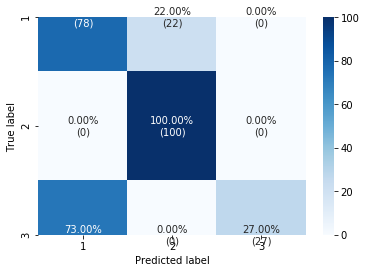

Mean Accuracy: 0.68
Mean Precision: 0.78
Mean Recall: 0.68
Mean F-measure: 0.68

Recall for class 1: 0.78
Recall for class 2: 1.00
Recall for class 3: 0.27

F-measure for class 1: 0.62
F-measure for class 2: 0.90
F-measure for class 3: 0.43


In [17]:
# Performance Evaluation Metrics
confusion_matrix(Y_test, pred_y)
metrics_summary(Y_test, pred_y)

# Non Linearly Separable Data

In [18]:
# Reading the data
root_dir = os.path.join('dataset', 'nonLinearlySeparable')
X_train, Y_train = parse_data(root_dir, 'train')
X_val, Y_val = parse_data(root_dir, 'val')
X_test, Y_test = parse_data(root_dir, 'test')

In [19]:
# Using the training data to compute estimators for mean and variance
model = BayesClassifier(Y_train, 2)
model.compute_mean(X_train, Y_train)
model.compute_std_dev(X_train, Y_train)

In [20]:
# Make predictions using the classifier
pred_y = model.predict(X_test)

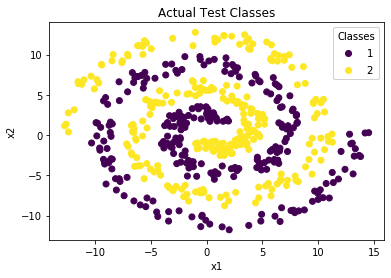

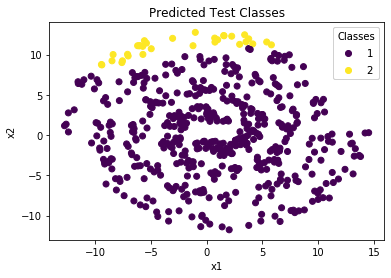

In [21]:
# Visualizaing the actual and predicted classes
plot_data(X_test, Y_test, 'Actual Test Classes')
plot_data(X_test, pred_y, 'Predicted Test Classes')

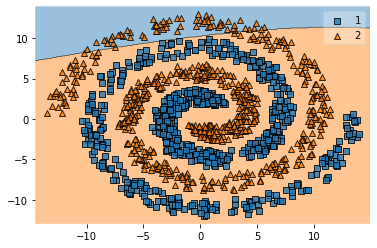

In [22]:
# Decision Region with Training Data
plot_decision_regions(X_train, Y_train, clf=model)

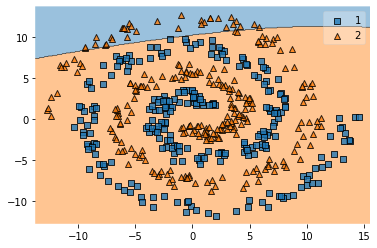

In [23]:
# Decision Region with Test Data
plot_decision_regions(X_test, Y_test, clf=model)

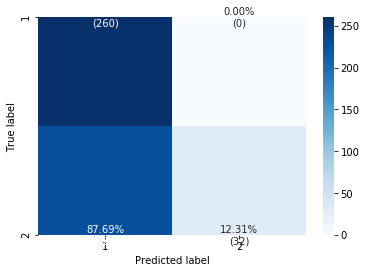

Mean Accuracy: 0.56
Mean Precision: 0.77
Mean Recall: 0.56
Mean F-measure: 0.56

Recall for class 1: 1.00
Recall for class 2: 0.12

F-measure for class 1: 0.70
F-measure for class 2: 0.22


In [24]:
# Performance Evaluation Metrics
confusion_matrix(Y_test, pred_y)
metrics_summary(Y_test, pred_y)